## Homework 6 and 7
http://wiki.quantsoftware.org/index.php?title=CompInvesti_Homework_6
http://wiki.quantsoftware.org/index.php?title=CompInvesti_Homework_7

In [1]:
from lib import DataAccess as da
from lib import qsdateutil as du
from lib import EventProfiler as ep
from lib import homework_2 as h2
from lib import homework_3 as h3
from lib import homework_4 as h4
from lib import homework_5 as h5
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

Bollinger value for the equity today <= -2.0<br>
Bollinger value for the equity yesterday >= -2.0<br>
Bollinger value for SPY today >= 1.0

In [2]:
def eventBB(dict_bb, compare = 'SPY',cut_off=-2):
    df_events = pd.DataFrame()
    n = len(dict_bb[compare])
    for key,df in dict_bb.iteritems():
        #if key == compare:
        #    continue
        df_events[key] = np.NAN*df['price'].copy()
        #for each day
        for i in range(n-1):
            if df['bollinger_val'][i+1]<=cut_off and \
               df['bollinger_val'][i] >= cut_off and \
               dict_bb[compare]['bollinger_val'][i]>=1.0:
                df_events[key][i+1] = 1
    return df_events

__Get Data:__

In [3]:
dataobj = da.DataAccess('Yahoo')
#date
startdate = dt.datetime(2008, 1, 1) 
enddate = dt.datetime(2009, 12, 31)
dt_timeofday = dt.timedelta(hours=16)
timestamps = du.getNYSEdays(startdate, enddate, dt_timeofday)

#data
symbols =  dataobj.get_symbols_from_list("sp5002012")
symbols.append('SPY')
keys = ['open', 'high', 'low', 'close', 'volume', 'actual_close']
ldf_data = dataobj.get_data(timestamps, symbols, keys)
data = dict(zip(keys, ldf_data))

#remove NAN from price data
for s_key in keys:
    data[s_key] = data[s_key].fillna(method = 'ffill')
    data[s_key] = data[s_key].fillna(method = 'bfill')
    data[s_key] = data[s_key].fillna(1.0)

__Example:__

In [4]:
%%time
dict_bb = h5.bollinger_bands(data['close'],alpha_std=1,plot=False)

/usr/local/lib/python2.7/dist-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


(1, '/', 504)
(2, '/', 504)
(3, '/', 504)
(4, '/', 504)
(5, '/', 504)
(6, '/', 504)
(7, '/', 504)
(8, '/', 504)
(9, '/', 504)
(10, '/', 504)
(11, '/', 504)
(12, '/', 504)
(13, '/', 504)
(14, '/', 504)
(15, '/', 504)
(16, '/', 504)
(17, '/', 504)
(18, '/', 504)
(19, '/', 504)
(20, '/', 504)
(21, '/', 504)
(22, '/', 504)
(23, '/', 504)
(24, '/', 504)
(25, '/', 504)
(26, '/', 504)
(27, '/', 504)
(28, '/', 504)
(29, '/', 504)
(30, '/', 504)
(31, '/', 504)
(32, '/', 504)
(33, '/', 504)
(34, '/', 504)
(35, '/', 504)
(36, '/', 504)
(37, '/', 504)
(38, '/', 504)
(39, '/', 504)
(40, '/', 504)
(41, '/', 504)
(42, '/', 504)
(43, '/', 504)
(44, '/', 504)
(45, '/', 504)
(46, '/', 504)
(47, '/', 504)
(48, '/', 504)
(49, '/', 504)
(50, '/', 504)
(51, '/', 504)
(52, '/', 504)
(53, '/', 504)
(54, '/', 504)
(55, '/', 504)
(56, '/', 504)
(57, '/', 504)
(58, '/', 504)
(59, '/', 504)
(60, '/', 504)
(61, '/', 504)
(62, '/', 504)
(63, '/', 504)
(64, '/', 504)
(65, '/', 504)
(66, '/', 504)
(67, '/', 504)
(68,

In [5]:
%%time
df_events = eventBB(dict_bb)
print(df_events.sum().sum(), 'events')

(494.0, 'events')
CPU times: user 5.09 s, sys: 44.1 ms, total: 5.13 s
Wall time: 5.14 s


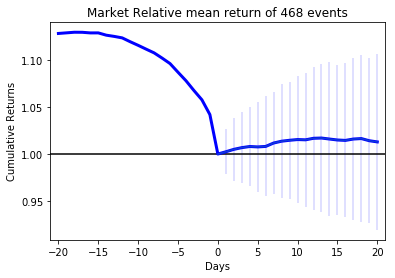

In [6]:
ep.eventprofiler(df_events, data, i_lookback=20, i_lookforward=20,
                 b_market_neutral=True, b_errorbars=True, s_market_sym='SPY')

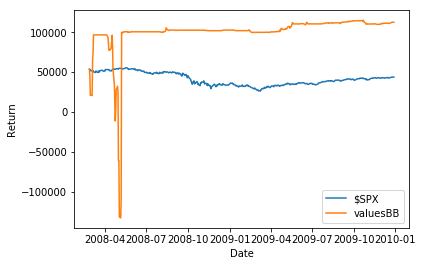

,symbol,daily_ret_avg,daily_ret_std,sharpe,cum_ret
0,$SPX,-0.000183,0.022508,-0.128742,0.816469
1,valuesBB,0.005534,0.528498,0.166231,2.099923


In [7]:
h4.evento2orders(df_events,'ordersBB')
h3.marketsim(100000,'ordersBB','valuesBB')
h3.analyze("valuesBB","$SPX")